In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can Notebook Template: Quick Dataset Exploration</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

This notebook may be used to quickly explore most data sets from Stats Can. To explore the contents of a dataset, simply visit https://www150.statcan.gc.ca/n1/en/type/data?MM=1 and select a "Table".

To select a table, copy the string next to Table, under the data set name. Here is an example. 

![](./CAN_G.gif)

In this case, the data set's table is 10-10-0122-01.

Simply copy and paste that table in the box below, and press the Download Dataset button. 


In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py

In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import qgrid as q
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep
import sys

grid_features = { 'fullWidthRows': True,
                  'syncColumnCellResize': True,
                  'forceFitColumns': True,
                  'enableColumnReorder': True,
                  'enableTextSelectionOnCells': True,
                  'editable': False,
                  'filterable': True,
                  'sortable': False,
                  'highlightSelectedRow': True}

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}



<h2 align='center'>Downloading Stats Can Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="10-10-0122-01",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( run_4cell )
display(prod_ID)
display(DS_button)

Text(value='10-10-0122-01', description='productID value', placeholder='ProductID value', style=DescriptionSty…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# # Download data 
productId = prod_ID.value

if "-" not in productId:
    if len(productId)!=10:
        print("WARNING: THIS IS LIKELY A NUMBER NOT ASSOCIATED WITH A DATA TABLE. VERIFY AND TRY AGAIN")
        sys.exit(1)

        

else: 
    if len(productId.split("-")) !=4:
        print("WARNING: THIS IS LIKELY A NUMBER NOT ASSOCIATED WITH A DATA TABLE. VERIFY AND TRY AGAIN")
        sys.exit(1)

        
download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df


# Example
#data = download_and_store_json(productId)

# Example, we will select the study we downloaded previously 

df_fullDATA = zip_table_to_dataframe(productId)




cols = list(df_fullDATA.loc[:,'REF_DATE':'UOM'])+ ['SCALAR_FACTOR'] +  ['VALUE']
df_less = df_fullDATA[cols]
df_less2 = df_less.drop(["DGUID"], axis=1)
df_less2.head()


PARSING DATA AS PANDAS DATAFRAME


,REF_DATE,GEO,Rates,UOM,SCALAR_FACTOR,VALUE
0,1934-01-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,-99.999
1,1934-02-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,-99.999
2,1934-03-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,2.980
3,1934-04-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,2.560
4,1934-05-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,-99.999


In [22]:
iteration_nr = df_less2.shape[1]
categories = []
for i in range(iteration_nr-1):
    categories.append(df_less2.iloc[:,i].unique())
    
    
all_the_widgets = []
for i in range(len(categories)):
    if i==0:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Start Date:', 
                style = style, 
                disabled=False
            )
        b_category = widgets.Dropdown(
                value = categories[i][-1],
                options = categories[i], 
                description ='End Date:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
        all_the_widgets.append(b_category)
    elif i==1:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Location:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
    elif i==len(categories)-1:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Scalar factor:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
        
    elif i==len(categories)-2:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Units of Measure :', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
    else:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Subcategory ' + str(i), 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)


## <h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [23]:
CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )

tab3 = VBox(children=[HBox(children=all_the_widgets[0:3]),
                      HBox(children=all_the_widgets[3:5]),
                      HBox(children=all_the_widgets[5:len(all_the_widgets)]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
df_sub = df_less2[(df_less2["REF_DATE"]>=all_the_widgets[0].value) & 
                  (df_less2["REF_DATE"]<=all_the_widgets[1].value) &
                  (df_less2["GEO"]==all_the_widgets[2].value) &
                  (df_less2["UOM"]==all_the_widgets[-2].value) & 
                  (df_less2["SCALAR_FACTOR"]==all_the_widgets[-1].value) ]



df_sub.head()

,REF_DATE,GEO,Rates,UOM,SCALAR_FACTOR,VALUE
0,1934-01-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,-99.999
1,1934-02-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,-99.999
2,1934-03-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,2.980
3,1934-04-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,2.560
4,1934-05-01,Canada,Treasury bill auction - average yields: 3 month,Percent,units,-99.999


In [28]:
# TO HANDLE THE REST OF THE COLUMNS, SIMPLY SUBSTITUTE VALUES 
col_name = df_sub.columns[2]

# weather_data = pd.read_csv("DATA.csv",sep=',')
col_name

df_sub_final = df_sub[(df_sub[col_name]==all_the_widgets[3].value)]

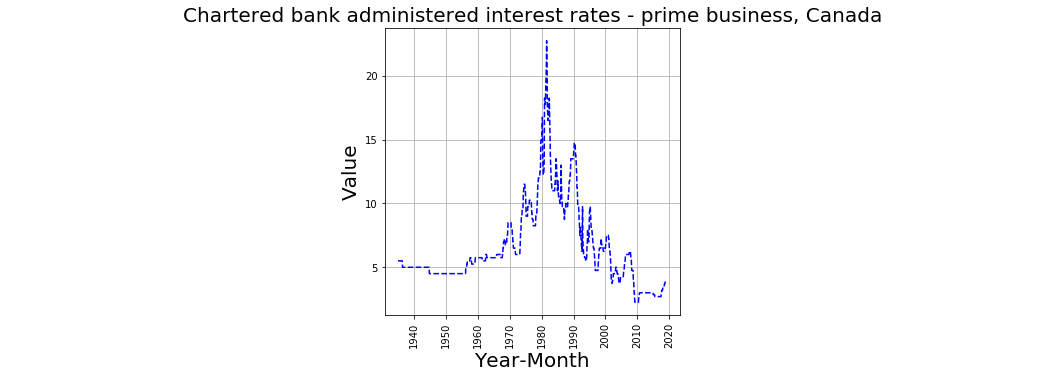

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(facecolor='w',figsize=(18,18))
plt.subplot(3, 3, 1)
plt.axis('off');

plt.subplot(3, 3, 2)
plt.plot(df_sub_final["REF_DATE"],df_sub_final["VALUE"],'b--',label='Value')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(str(all_the_widgets[3].value) + ", "+  str(all_the_widgets[2].value),fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)


plt.subplot(3, 3, 3);
plt.axis('off');


<h2 align='center'>References</h2>

Statistics Canada.  

https://www150.statcan.gc.ca/n1/en/type/data?MM=1

# ![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)